In [14]:
# Importing Required Libraries

import numpy as np
import pandas as pd
import copy

### Using the South German Credit (UPDATE) Data Set
Dataset Link : https://archive.ics.uci.edu/ml/datasets/South+German+Credit+%28UPDATE%29

In [8]:
df = pd.read_csv("SouthGermanCredit/SouthGermanCredit.asc",skiprows=4,encoding="gbk",engine='python',sep=' ',delimiter=None, index_col=False,header=None,skipinitialspace=True)

In [9]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
1,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
2,1,10,4,0,2241,1,2,1,3,1,...,1,48,3,1,2,2,1,1,1,1
3,1,8,4,0,3398,1,4,1,3,1,...,1,39,3,2,2,2,2,1,1,1
4,1,6,4,0,1361,1,2,2,3,1,...,1,40,3,2,1,2,1,1,1,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       997 non-null    int64
 1   1       997 non-null    int64
 2   2       997 non-null    int64
 3   3       997 non-null    int64
 4   4       997 non-null    int64
 5   5       997 non-null    int64
 6   6       997 non-null    int64
 7   7       997 non-null    int64
 8   8       997 non-null    int64
 9   9       997 non-null    int64
 10  10      997 non-null    int64
 11  11      997 non-null    int64
 12  12      997 non-null    int64
 13  13      997 non-null    int64
 14  14      997 non-null    int64
 15  15      997 non-null    int64
 16  16      997 non-null    int64
 17  17      997 non-null    int64
 18  18      997 non-null    int64
 19  19      997 non-null    int64
 20  20      997 non-null    int64
dtypes: int64(21)
memory usage: 163.7 KB


### Visualization

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
columns = ["status","duration","credit_history","purpose","amount","savings",
           "employment_duration","installment_rate","personal_status_sex",
           "other_debtors","present_residence","property","age","other_installment_plans",
           "housing","number_credits","job","people_liable","telephone","foreign_worker","credit_risk"]

In [18]:
df_vis = copy.deepcopy(df)
df_vis.columns = columns

In [19]:
df_vis.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
1,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
2,1,10,4,0,2241,1,2,1,3,1,...,1,48,3,1,2,2,1,1,1,1
3,1,8,4,0,3398,1,4,1,3,1,...,1,39,3,2,2,2,2,1,1,1
4,1,6,4,0,1361,1,2,2,3,1,...,1,40,3,2,1,2,1,1,1,1


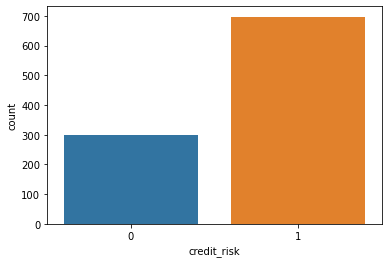

In [22]:
sns.countplot(x="credit_risk",data=df_vis)
plt.show()

## Prepare Data

In [38]:
from sklearn.model_selection import train_test_split

## Classifiers
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import fbeta_score, f1_score,precision_score,recall_score,accuracy_score, roc_curve, auc

In [23]:
# split the data frame into inputs and outputs
last_ix = len(df.columns) - 1
X, y = df.drop(last_ix, axis=1), df[last_ix]
# print(y.head())
# X.head()

In [26]:
#Splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2) #80% and 20%

In [28]:
rf_clf = RandomForestClassifier(criterion='gini') # with other parameters set to default
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [39]:
logreg_clf = LogisticRegression(penalty='l2',C=1.0, max_iter=10000)
logreg_clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [40]:
# SVM classifier
svm_clf = SVC(kernel='poly', degree=3, max_iter=300000)
svm_clf.fit(X_train, y_train)

SVC(kernel='poly', max_iter=300000)

In [41]:
# Declare a Decision Tree classifier with gini

dt_gini_clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2)
# Create Decision Tree on the training data
dt_gini_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [42]:
# Declare a Decision Tree classifier with entropy

dt_ent_clf = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None, min_samples_split=2)
# Create Decision Tree on the training data
dt_ent_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [47]:
trained_classifiers = {}

classifiers = [rf_clf,logreg_clf,svm_clf,dt_gini_clf,dt_ent_clf]

for classifier in classifiers:
#     print(classifier.__str__())
    key = classifier.__str__().split('(')[0]
    
#     if key in trained_classifiers.keys():
#         key += "_"+classifier.__str__().split("'")[1]
    
    if "'" in classifier.__str__():
        key += '_' + classifier.__str__().split("'")[1]
        
    trained_classifiers[key] = {
            "clf" : classifier,
            "description" : classifier.__str__()
        }

trained_classifiers.keys()

dict_keys(['RandomForestClassifier', 'LogisticRegression', 'SVC_poly', 'DecisionTreeClassifier', 'DecisionTreeClassifier_entropy'])

In [48]:
for classifier in trained_classifiers.keys():
    trained_classifiers[classifier]['y_pred'] = trained_classifiers[classifier]['clf'].predict(X_test)

In [49]:
for classifier in trained_classifiers.keys():
    y_pred = trained_classifiers[classifier]['y_pred']
    trained_classifiers[classifier]['precision'] = precision_score(y_test,y_pred, average='micro')
    trained_classifiers[classifier]['recall'] = recall_score(y_test,y_pred, average='micro')
    trained_classifiers[classifier]['accuracy'] = accuracy_score(y_test,y_pred)
    trained_classifiers[classifier]['f1'] = f1_score(y_test,y_pred, average='macro')

In [50]:
for classifier in trained_classifiers.keys():
    print(f"Classifier : {classifier}")
    print(f"Accuracy: {trained_classifiers[classifier]['accuracy']}")
    print(f"Recall: {trained_classifiers[classifier]['recall']}")
    print(f"Precision: {trained_classifiers[classifier]['precision']}")
    print(f"F1-score: {trained_classifiers[classifier]['f1']}")
    print()

Classifier : RandomForestClassifier
Accuracy: 0.77
Recall: 0.77
Precision: 0.77
F1-score: 0.6702508960573477

Classifier : LogisticRegression
Accuracy: 0.74
Recall: 0.74
Precision: 0.74
F1-score: 0.6148718708339506

Classifier : SVC_poly
Accuracy: 0.72
Recall: 0.72
Precision: 0.72
F1-score: 0.465546860087803

Classifier : DecisionTreeClassifier
Accuracy: 0.695
Recall: 0.695
Precision: 0.695
F1-score: 0.645090909090909

Classifier : DecisionTreeClassifier_entropy
Accuracy: 0.705
Recall: 0.705
Precision: 0.705
F1-score: 0.6321581096667602



In [52]:
classifiers.sort(key)

TypeError: '<' not supported between instances of 'LogisticRegression' and 'RandomForestClassifier'